In [1]:
pip install tslearn

In [2]:
pip install wordcloud

In [3]:
pip install jupyter-datatables

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from statsmodels.tsa.seasonal import seasonal_decompose
from tslearn.clustering import TimeSeriesKMeans

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [7]:
weather = pd.read_csv("India_Weather_2022.csv",index_col='DATE')

In [8]:
#from jupyter_datatables import init_datatables_mode
#init_datatables_mode()
#pd.read_csv("India_Weather_2022.csv")

In [9]:
weather = pd.read_csv("India_Weather_2022.csv",index_col='DATE')

In [10]:
weather.index.is_monotonic

False

In [11]:
weather.duplicated().sum()

5860

In [12]:
pd.Series(weather['NAME'].value_counts())

THIRUVANANTHAPURAM, IN    730
CALCUTTA ALIPORE, IN      365
CHITRADURGA, IN           365
TIRUCHCHIRAPALLI, IN      365
MACHILIPATNAM, IN         365
                         ... 
DARJEELING, IN             66
SILIGURI, IN               26
ALLAHABAD, IN              14
PARBHANI, IN                2
CHERRAPUNJI, IN             2
Name: NAME, Length: 136, dtype: int64

# 3. Exploratory Data Analysis

In [13]:
weather.describe().T

count        mean         std     min     25%      50%      75%  \
LATITUDE   46285.0   21.709457    5.981610   8.467  17.350   22.717   26.233   
LONGITUDE  46285.0   79.702591    6.227500  68.850  74.917   78.100   83.250   
ELEVATION  46285.0  300.275947  393.116580   3.000  38.000  177.000  399.000   
PRCP       14706.0    0.431367    0.875837   0.000   0.000    0.080    0.460   
TAVG       46285.0   79.039257   10.058903  31.000  74.000   81.000   86.000   
TMAX       32538.0   90.550065   10.057338  35.000  85.000   91.000   96.000   
TMIN       39625.0   68.648757   11.046868  22.000  62.000   72.000   77.000   

                max  
LATITUDE     34.083  
LONGITUDE    95.383  
ELEVATION  2311.000  
PRCP         14.250  
TAVG        110.000  
TMAX        119.000  
TMIN         93.000

array([[<AxesSubplot:title={'center':'LATITUDE'}>,
        <AxesSubplot:title={'center':'LONGITUDE'}>,
        <AxesSubplot:title={'center':'ELEVATION'}>],
       [<AxesSubplot:title={'center':'PRCP'}>,
        <AxesSubplot:title={'center':'TAVG'}>,
        <AxesSubplot:title={'center':'TMAX'}>],
       [<AxesSubplot:title={'center':'TMIN'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

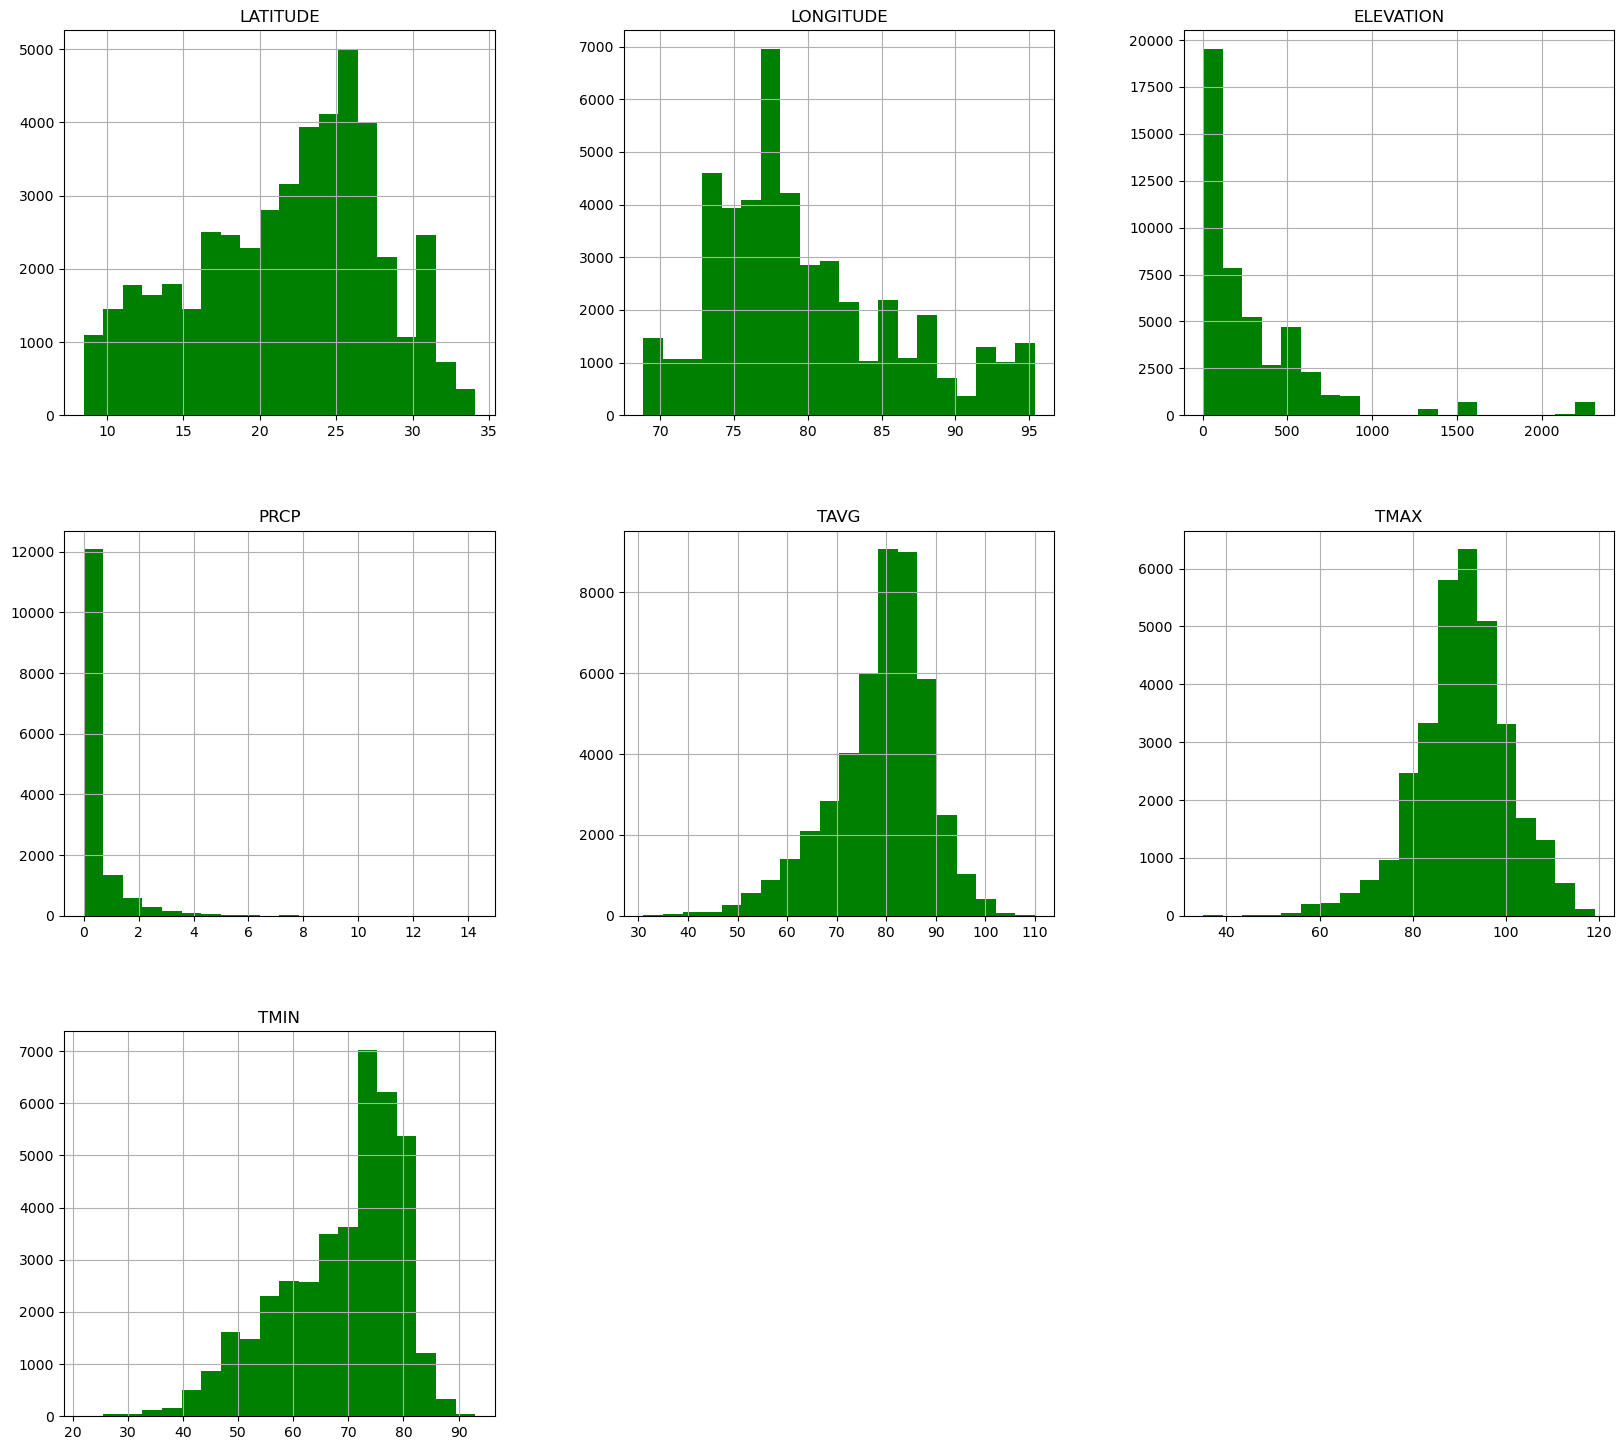

In [14]:
weather.hist(bins=20,figsize=(20,18),color='green')

In [15]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46285 entries, 01-01-2022 to 31-12-2022
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    46285 non-null  object 
 1   NAME       46285 non-null  object 
 2   LATITUDE   46285 non-null  float64
 3   LONGITUDE  46285 non-null  float64
 4   ELEVATION  46285 non-null  float64
 5   PRCP       14706 non-null  float64
 6   TAVG       46285 non-null  int64  
 7   TMAX       32538 non-null  float64
 8   TMIN       39625 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 3.5+ MB


In [16]:
weather.isnull().sum()/weather.shape[0]

STATION      0.000000
NAME         0.000000
LATITUDE     0.000000
LONGITUDE    0.000000
ELEVATION    0.000000
PRCP         0.682273
TAVG         0.000000
TMAX         0.297008
TMIN         0.143891
dtype: float64

In [17]:
weather1 = weather[["PRCP", "TMAX", "TMIN"]].copy()
weather1.columns = ['precip','temp_max','temp_min']

In [18]:
weather1.isnull().sum()

precip      31579
temp_max    13747
temp_min     6660
dtype: int64

In [19]:
weather1[pd.isnull(weather1['precip'])]

precip  temp_max  temp_min
DATE                                  
01-01-2022     NaN      83.0      67.0
01-01-2022     NaN       NaN       NaN
01-01-2022     NaN       NaN      51.0
01-01-2022     NaN       NaN       NaN
01-01-2022     NaN       NaN      64.0
...            ...       ...       ...
31-12-2022     NaN       NaN      72.0
31-12-2022     NaN      74.0      49.0
31-12-2022     NaN      92.0      61.0
31-12-2022     NaN       NaN      43.0
31-12-2022     NaN       NaN      50.0

[31579 rows x 3 columns]

In [20]:
weather1['precip'].value_counts()/weather1.shape[0]

0.00    0.101437
0.08    0.016290
0.04    0.016226
0.02    0.015426
0.12    0.012877
          ...   
5.63    0.000022
3.65    0.000022
4.33    0.000022
1.25    0.000022
1.20    0.000022
Name: precip, Length: 349, dtype: float64

In [21]:
weather1['precip'] = weather1['precip'].fillna(0)

In [22]:
weather1.apply(pd.isnull).sum()

precip          0
temp_max    13747
temp_min     6660
dtype: int64

In [23]:
weather1[pd.isnull(weather1['temp_min'])]

precip  temp_max  temp_min
DATE                                  
01-01-2022     0.0       NaN       NaN
01-01-2022     0.0       NaN       NaN
01-01-2022     0.0      82.0       NaN
01-01-2022     0.0       NaN       NaN
01-01-2022     0.0      86.0       NaN
...            ...       ...       ...
31-12-2022     0.0       NaN       NaN
31-12-2022     0.0       NaN       NaN
31-12-2022     0.0      84.0       NaN
31-12-2022     0.0       NaN       NaN
31-12-2022     0.0      81.0       NaN

[6660 rows x 3 columns]

In [24]:
weather1.loc['10-10-2022':'20-10-2022']

precip  temp_max  temp_min
DATE                                  
10-10-2022    0.00      79.0      73.0
10-10-2022    0.16      90.0      74.0
10-10-2022    0.00       NaN      76.0
10-10-2022    0.00       NaN      78.0
10-10-2022    0.00      94.0       NaN
...            ...       ...       ...
20-10-2022    0.00      93.0      66.0
20-10-2022    0.00      67.0      45.0
20-10-2022    0.00      91.0      75.0
20-10-2022    0.00      85.0       NaN
20-10-2022    0.00       NaN      72.0

[1381 rows x 3 columns]

In [25]:
weather1 = weather1.fillna(method='ffill')

In [26]:
weather1.apply(pd.isnull).sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

## Check for Missing Value 

In [27]:
weather1.apply(lambda x: (x == 9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

In [28]:
weather1.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [29]:
weather1.index

Index(['01-01-2022', '01-01-2022', '01-01-2022', '01-01-2022', '01-01-2022',
       '01-01-2022', '01-01-2022', '01-01-2022', '01-01-2022', '01-01-2022',
       ...
       '31-12-2022', '31-12-2022', '31-12-2022', '31-12-2022', '31-12-2022',
       '31-12-2022', '31-12-2022', '31-12-2022', '31-12-2022', '31-12-2022'],
      dtype='object', name='DATE', length=46285)

In [30]:
weather1.index = pd.to_datetime(weather1.index)

In [31]:
weather1.index.year

Int64Index([2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=46285)

<AxesSubplot:xlabel='DATE'>

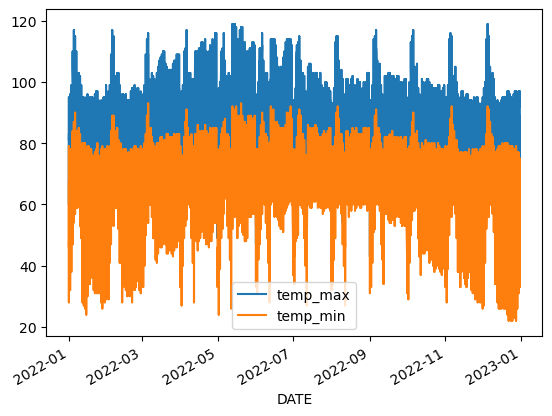

In [32]:
weather1[['temp_max','temp_min']].plot()

<AxesSubplot:xlabel='DATE'>

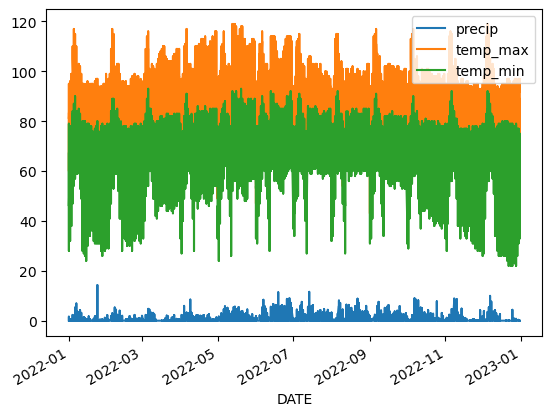

In [33]:
weather1[['precip','temp_max','temp_min']].plot()

In [34]:
weather1.index.year.value_counts().sort_index()

2022    46285
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

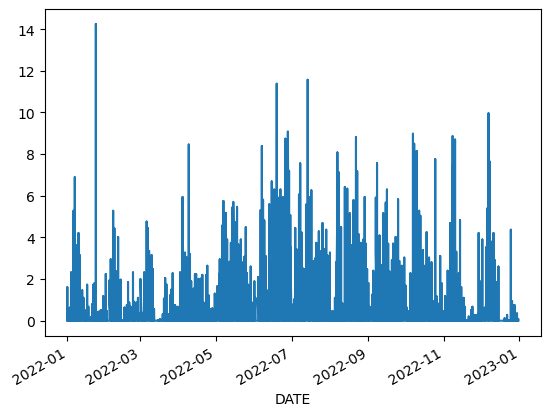

In [35]:
weather1['precip'].plot()

<AxesSubplot:xlabel='DATE'>

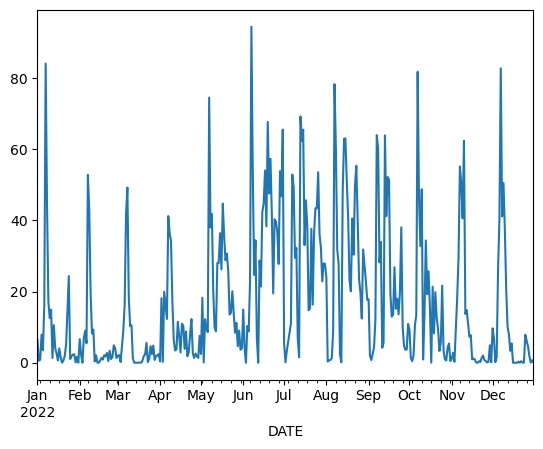

In [36]:
weather1.groupby(weather1.index).apply(lambda x: x["precip"].sum()).plot()

<AxesSubplot:xlabel='DATE'>

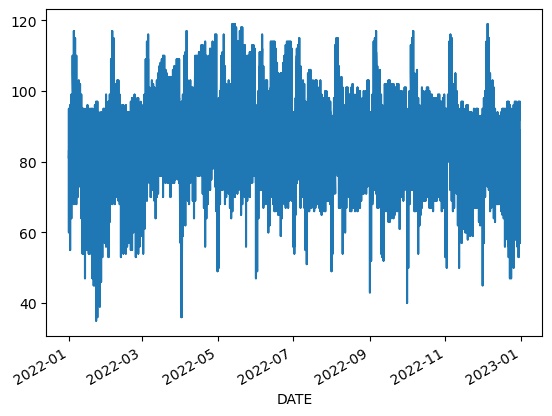

In [37]:
weather1['temp_max'].plot()

<AxesSubplot:xlabel='DATE'>

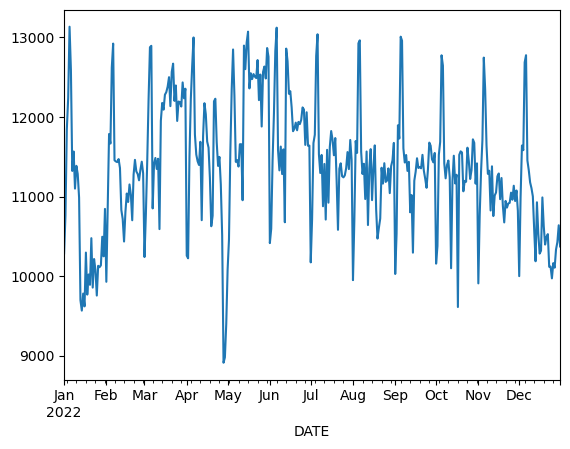

In [38]:
weather1.groupby(weather1.index).apply(lambda x: x["temp_max"].sum()).plot()

<AxesSubplot:xlabel='DATE'>

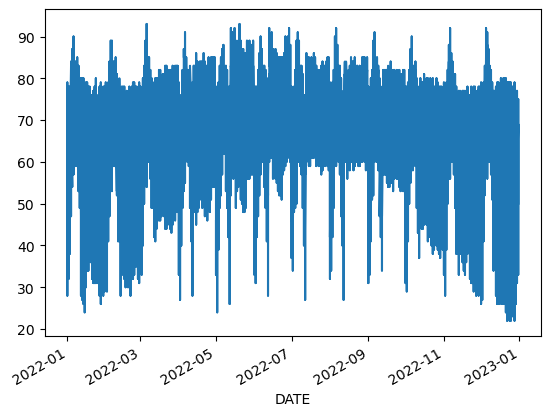

In [39]:
weather1['temp_min'].plot()

<AxesSubplot:xlabel='DATE'>

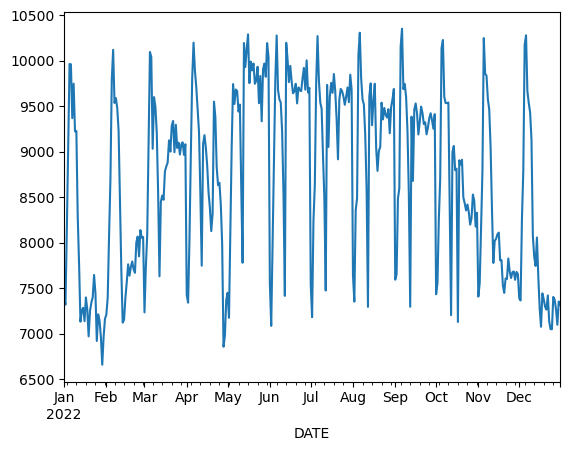

In [40]:
weather1.groupby(weather1.index).apply(lambda x: x["temp_min"].sum()).plot()

In [41]:
weather1['target'] = weather1.shift(-1)['temp_max']

In [42]:
weather1

precip  temp_max  temp_min  target
DATE                                          
2022-01-01     0.0      83.0      67.0    83.0
2022-01-01     0.0      83.0      67.0    83.0
2022-01-01     0.0      83.0      51.0    83.0
2022-01-01     0.0      83.0      51.0    83.0
2022-01-01     0.0      83.0      64.0    83.0
...            ...       ...       ...     ...
2022-12-31     0.0      74.0      49.0    57.0
2022-12-31     0.0      57.0      33.0    92.0
2022-12-31     0.0      92.0      61.0    92.0
2022-12-31     0.0      92.0      43.0    92.0
2022-12-31     0.0      92.0      50.0     NaN

[46285 rows x 4 columns]

In [43]:
weather1 = weather1.iloc[:-1,:].copy()

In [44]:
weather1

precip  temp_max  temp_min  target
DATE                                          
2022-01-01     0.0      83.0      67.0    83.0
2022-01-01     0.0      83.0      67.0    83.0
2022-01-01     0.0      83.0      51.0    83.0
2022-01-01     0.0      83.0      51.0    83.0
2022-01-01     0.0      83.0      64.0    83.0
...            ...       ...       ...     ...
2022-12-31     0.0      90.0      72.0    74.0
2022-12-31     0.0      74.0      49.0    57.0
2022-12-31     0.0      57.0      33.0    92.0
2022-12-31     0.0      92.0      61.0    92.0
2022-12-31     0.0      92.0      43.0    92.0

[46284 rows x 4 columns]

In [45]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [46]:
predictors=['precip','temp_max','temp_min']

In [47]:
train = weather1.loc[:'31-12-2022']
test = weather1.loc['01-01-2022':]

In [48]:
train

precip  temp_max  temp_min  target
DATE                                          
2022-01-01     0.0      83.0      67.0    83.0
2022-01-01     0.0      83.0      67.0    83.0
2022-01-01     0.0      83.0      51.0    83.0
2022-01-01     0.0      83.0      51.0    83.0
2022-01-01     0.0      83.0      64.0    83.0
...            ...       ...       ...     ...
2022-12-31     0.0      90.0      72.0    74.0
2022-12-31     0.0      74.0      49.0    57.0
2022-12-31     0.0      57.0      33.0    92.0
2022-12-31     0.0      92.0      61.0    92.0
2022-12-31     0.0      92.0      43.0    92.0

[46284 rows x 4 columns]

In [49]:
test

precip  temp_max  temp_min  target
DATE                                          
2022-01-01     0.0      83.0      67.0    83.0
2022-01-01     0.0      83.0      67.0    83.0
2022-01-01     0.0      83.0      51.0    83.0
2022-01-01     0.0      83.0      51.0    83.0
2022-01-01     0.0      83.0      64.0    83.0
...            ...       ...       ...     ...
2022-12-31     0.0      90.0      72.0    74.0
2022-12-31     0.0      74.0      49.0    57.0
2022-12-31     0.0      57.0      33.0    92.0
2022-12-31     0.0      92.0      61.0    92.0
2022-12-31     0.0      92.0      43.0    92.0

[46284 rows x 4 columns]

In [50]:
reg.fit(train[predictors],train['target'])

Ridge(alpha=0.1)

In [51]:
predictions = reg.predict(test[predictors])

In [52]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test['target'],predictions)

69.98223174046709

In [53]:
combined = pd.concat([test['target'],pd.Series(predictions,index=test.index)],axis=1)
combined.columns = ['actual','predictions']

In [54]:
combined

actual  predictions
DATE                           
2022-01-01    83.0    86.246383
2022-01-01    83.0    86.246383
2022-01-01    83.0    83.955954
2022-01-01    83.0    83.955954
2022-01-01    83.0    85.816928
...            ...          ...
2022-12-31    74.0    90.118313
2022-12-31    57.0    79.611717
2022-12-31    92.0    69.656302
2022-12-31    92.0    89.445406
2022-12-31    92.0    86.868674

[46284 rows x 2 columns]

<AxesSubplot:xlabel='DATE'>

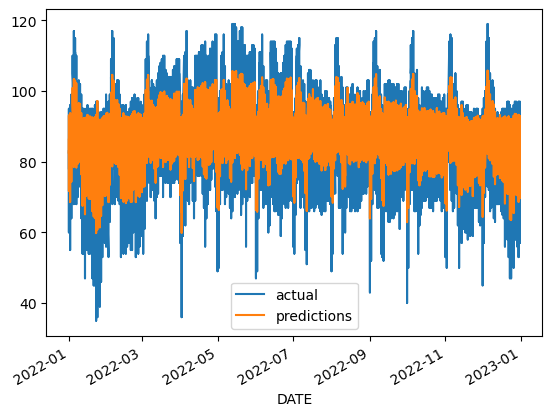

In [55]:
combined.plot()

In [56]:
reg.coef_

array([1.15483111, 0.45088151, 0.14315181])

In [57]:
weather1['month_max'] = weather1['temp_max'].rolling(30).mean()
weather1['month_day_max'] = weather1['month_max'] / weather1['temp_max']
weather1['max_min'] = weather1['temp_max'] / weather1['temp_min']

In [58]:
weather1 = weather1.iloc[30:,:].copy()

In [59]:
def create_predictions(predictors,weather1,reg):
    train = weather1.loc[:'31-10-2022']
    test = weather1.loc['01-11-2022':]
    
    reg.fit(train[predictors],train["target"])
    predictions = reg.predict(test[predictors])
    
    error = mean_squared_error(test['target'],predictions)
    
    combined = pd.concat([test['target'],pd.Series(predictions,index=test.index)],axis=1)
    combined.columns = ['actual','predictions']
    
    return error, combined

In [60]:
predictors = ['precip','temp_max','temp_min','month_day_max','max_min']

In [61]:
weather1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46254 entries, 2022-01-01 to 2022-12-31
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precip         46254 non-null  float64
 1   temp_max       46254 non-null  float64
 2   temp_min       46254 non-null  float64
 3   target         46254 non-null  float64
 4   month_max      46254 non-null  float64
 5   month_day_max  46254 non-null  float64
 6   max_min        46254 non-null  float64
dtypes: float64(7)
memory usage: 2.8 MB


In [62]:
weather1.isna().sum()

precip           0
temp_max         0
temp_min         0
target           0
month_max        0
month_day_max    0
max_min          0
dtype: int64

In [63]:
weather1['month_day_max'] = weather1['month_day_max'].fillna(method='ffill')

In [64]:
weather1['max_min'] = weather1['max_min'].fillna(method='ffill')

In [65]:
error = create_predictions(predictors,weather1,reg)
error

(42.93966674913928,
             actual  predictions
 DATE                           
 2022-01-11    91.0    86.931623
 2022-01-11    91.0    88.261110
 2022-01-11    91.0    88.636819
 2022-01-11    91.0    88.521082
 2022-01-11    87.0    88.486012
 ...            ...          ...
 2022-12-31    74.0    83.933310
 2022-12-31    57.0    79.179098
 2022-12-31    92.0    81.540386
 2022-12-31    92.0    84.573414
 2022-12-31    92.0    87.092499
 
 [7851 rows x 2 columns])

<AxesSubplot:xlabel='DATE'>

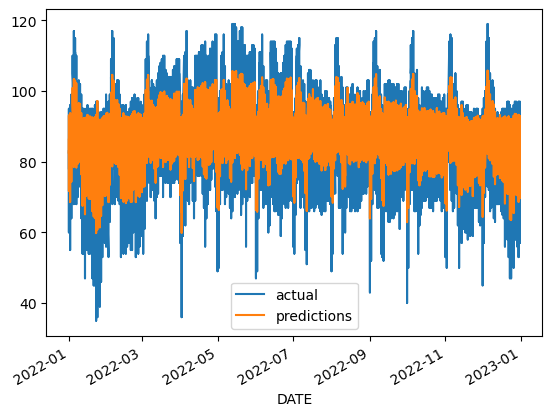

In [66]:
combined['2000':].plot()

In [67]:
weather1['monthly_avg'] = weather1['temp_max'].groupby(weather1.index.month).apply(lambda x:x.expanding(1).mean())
weather1["day_of_year_avg"] = weather1["temp_max"].groupby(weather1.index.year).apply(lambda x: x.expanding(1).mean())

In [68]:
error, combined = create_predictions(predictors + ["monthly_avg", "day_of_year_avg"], weather1, reg)
error

43.44430346452813

In [69]:
reg.coef_

array([4.84487261e-01, 6.66096992e-01, 2.44888016e-01, 4.70180191e+01,
       1.08920240e+01, 1.25295685e-01, 1.72908210e-02])

In [70]:
weather1.corr()["target"]

precip             0.027076
temp_max           0.541767
temp_min           0.442342
target             1.000000
month_max          0.633527
month_day_max     -0.171712
max_min           -0.100622
monthly_avg        0.423043
day_of_year_avg    0.284113
Name: target, dtype: float64

In [71]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [72]:
combined.sort_values("diff", ascending=False).head(10)

actual  predictions       diff
DATE                                      
2022-12-23    47.0    82.970123  35.970123
2022-07-11    55.0    90.409974  35.409974
2022-07-12    51.0    85.352732  34.352732
2022-09-11    53.0    86.877359  33.877359
2022-12-24    47.0    80.578568  33.578568
2022-11-12    50.0    83.271745  33.271745
2022-12-30    53.0    86.078548  33.078548
2022-12-30    53.0    85.718035  32.718035
2022-12-26    50.0    82.332958  32.332958
2022-12-30    53.0    85.191766  32.191766

<AxesSubplot:>

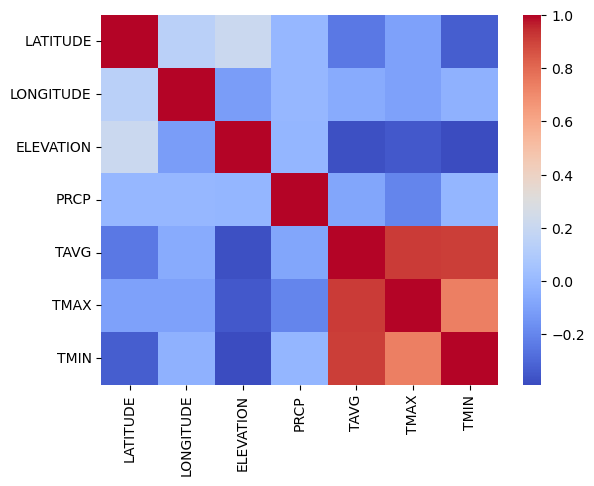

In [73]:
sns.heatmap(weather.corr(),cmap='coolwarm')

In [74]:
from geopy.geocoders import ArcGIS
import folium

In [75]:
nom=ArcGIS()

In [76]:
a_list1 = weather[['NAME','LATITUDE','LONGITUDE']].values.tolist()

In [77]:
a_list = a_list1[:100]
a_list

[['SANGLI, IN', 16.85, 74.6],
 ['BHUBANESWAR, IN', 20.25, 85.833],
 ['BARMER, IN', 25.75, 71.383],
 ['AHMADABAD, IN', 23.066999999999997, 72.633],
 ['PORBANDAR, IN', 21.65, 69.667],
 ['PASIGHAT, IN', 28.1, 95.383],
 ['MANGALORE BAJPE, IN', 12.917, 74.883],
 ['BEGUMPET OBSERVATORY, IN', 17.45, 78.47],
 ['RAJKOT, IN', 22.3, 70.783],
 ['SURAT, IN', 21.2, 72.833],
 ['RATNAGIRI, IN', 16.983, 73.333],
 ['BAHRAICH, IN', 27.566999999999997, 81.6],
 ['GWALIOR, IN', 26.233, 78.25],
 ['SRINAGAR, IN', 34.083, 74.833],
 ['KARWAR, IN', 14.783, 74.133],
 ['NEW DELHI PALAM, IN', 28.566999999999997, 77.117],
 ['VISHAKHAPATNAM, IN', 17.717, 83.23299999999999],
 ['JALPAIGURI, IN', 26.533, 88.71700000000001],
 ['NEW DELHI SAFDARJUN, IN', 28.583000000000002, 77.2],
 ['TEZPUR, IN', 26.616999999999997, 92.78299999999999],
 ['BHAUNAGAR, IN', 21.75, 72.2],
 ['PATIALA, IN', 30.333000000000002, 76.467],
 ['GULBARGA, IN', 17.35, 76.85],
 ['CHURU, IN', 28.25, 74.917],
 ['UDAIPUR DABOK, IN', 24.616999999999997, 73.

In [82]:
weather_map = folium.Map(location=[26.816999999999997,75.8])
fg = folium.FeatureGroup(name='weather')

for i in a_list:
    fg.add_child(folium.Marker(location = [i[1],i[2]],popup=i[0],icon=folium.Icon(color='red'),icon_size=0.5))
weather_map.add_child(fg)

In [79]:
weather_map.save('India Weather Location.html')

In [80]:
from pandas_profiling import ProfileReport

profile = ProfileReport(weather, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [81]:
profile.to_file("India 2022 Weather Report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]